In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras. mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


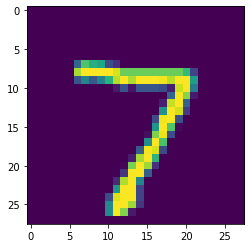

In [3]:
plt.imshow(X_test[0])

In [4]:
X_train = X_train/255 
X_test = X_test/255

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [6]:
X_train.shape

(60000, 28, 28)

In [14]:
#output dense
28*28

784

In [48]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [49]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [50]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=3),metrics=['accuracy'])

In [51]:
autoencoder.fit(X_train,X_train,epochs=20,
                validation_data=(X_test,X_test))

Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2806 - accuracy: 0.0861 - val_loss: 0.1811 - val_accuracy: 0.1623
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1731 - accuracy: 0.1785 - val_loss: 0.1504 - val_accuracy: 0.2083
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1499 - accuracy: 0.2123 - val_loss: 0.1401 - val_accuracy: 0.2264
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1405 - accuracy: 0.2266 - val_loss: 0.1323 - val_accuracy: 0.2374
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1342 - accuracy: 0.2344 - val_loss: 0.1276 - val_accuracy: 0.2350
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1286 - accuracy: 0.2420 - val_loss: 0.1248 - val_accuracy: 0.2430
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1254 - accuracy: 0.2453 - val_loss: 0.1234 -

In [52]:
lossess = pd.DataFrame(autoencoder.history.history)

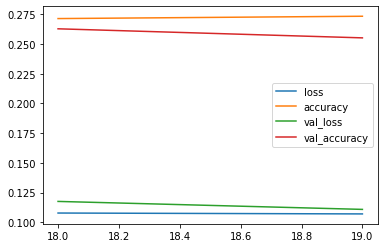

In [53]:
lossess[18:].plot()

In [54]:
lossess

,loss,accuracy,val_loss,val_accuracy
0,0.229459,0.113711,0.181074,0.162296
1,0.165764,0.189048,0.150426,0.208282
2,0.147130,0.216092,0.140052,0.226368
3,0.138980,0.228171,0.132271,0.237379
4,0.132690,0.236029,0.127641,0.235021
5,0.127972,0.242488,0.124840,0.242957
6,0.124690,0.246517,0.123376,0.246261
7,0.121922,0.250582,0.119599,0.250725
8,0.119558,0.254145,0.117626,0.254171
9,0.117601,0.256789,0.117500,0.252636


In [59]:
passed_images = autoencoder.predict(X_test[:10])

orginal image


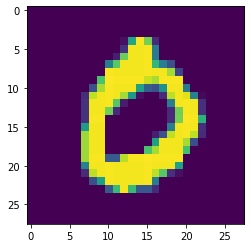

reconstucted image


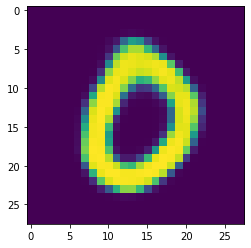

In [61]:
n=3

print('orginal image')
plt.imshow(X_test[n])
plt.show()
print('reconstucted image')
plt.imshow(passed_images[n])

In [62]:
from tensorflow.keras.layers import GaussianNoise

In [63]:
sample = GaussianNoise(0.2)

In [64]:
noisy = sample(X_test[:10], training=True)

orginal image


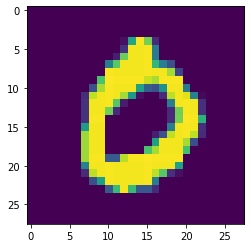

noisy image


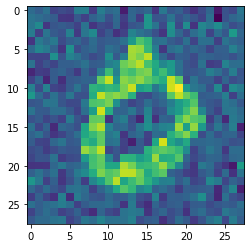

In [66]:
n=3

print('orginal image')
plt.imshow(X_test[n])
plt.show()
print('noisy image')
plt.imshow(noisy[n])

In [67]:
import tensorflow as tf

In [68]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [69]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [70]:
noise_remove = Sequential([encoder,decoder])
noise_remove.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
noise_remove.summary()

In [71]:
noise_remove.fit(X_train,X_train,epochs=20,
                validation_data=(X_test,X_test))

Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2149 - accuracy: 0.1375 - val_loss: 0.1358 - val_accuracy: 0.2227
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1335 - accuracy: 0.2277 - val_loss: 0.1208 - val_accuracy: 0.2382
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1223 - accuracy: 0.2425 - val_loss: 0.1154 - val_accuracy: 0.2501
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1173 - accuracy: 0.2506 - val_loss: 0.1111 - val_accuracy: 0.2530
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1130 - accuracy: 0.2598 - val_loss: 0.1072 - val_accuracy: 0.2664
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1098 - accuracy: 0.2650 - val_loss: 0.1059 - val_accuracy: 0.2682
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1078 - accuracy: 0.2688 - val_loss: 0.1039 -

In [72]:
denoised = noise_remove(noisy)

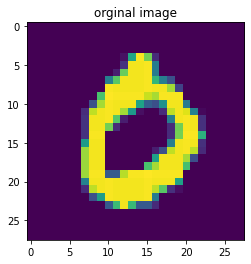

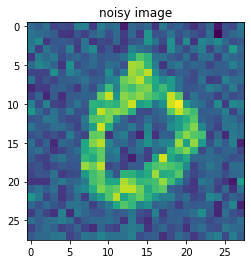

Text(0.5, 1.0, 'denoised image')

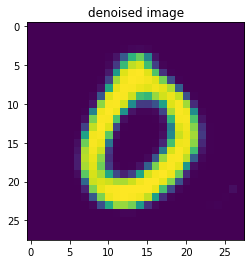

In [81]:
n=3
plt.imshow(X_test[n])
plt.title('orginal image')
plt.show()

plt.imshow(noisy[n])
plt.title('noisy image')
plt.show()

plt.imshow(denoised[n])
plt.title('denoised image')

In [82]:
noise_remove.save('image_noise_removal.h5')